<a class="reference external" href="https://jupyter.designsafe-ci.org/hub/user-redirect/lab/tree/CommunityData/Training/Computational-Workflows-on-DesignSafe/Jupyter_Notebooks/Jupyter_Notebooks_OpenSees/runOps_RunAnyOpenSeesInPython.ipynb" target="_blank">
<img alt="Try on DesignSafe" src="https://raw.githubusercontent.com/DesignSafe-Training/pinn/main/DesignSafe-Badge.svg" /></a>

# ANY OpenSees from a Notebook

**Running OpenSees & OpenSeesPy Input Scripts from a DesignSafe Jupyter Notebook**

*by Silvia Mazzoni, DesignSafe, 2025*


This notebook shows how to run **any OpenSees script** — whether written in **Tcl** or **Python (OpenSeesPy)** — using Python’s built-in `os` library to execute commands just like in a terminal.

You can apply this technique in:

* A **Jupyter notebook**, for an interactive and user-friendly experience
* A **standalone Python script**, for automated or large-scale workflows


### Why Use This Approach?

* It makes running OpenSees in the **DesignSafe JupyterHub** environment highly **user-friendly**
* It lets you build seamless, **Python-driven workflows** that can include preprocessing, simulation, and postprocessing in one place
* It works with **any version of OpenSees** already available in the Jupyter environment
* You can also apply the same method to call OpenSees on an **HPC system** (e.g., Stampede3), making it easier to scale up or integrate into continuous workflows


### Key Concepts:

* Use `os.system()` to call `.tcl` or `.py` input files from Python
* Outputs go to the path defined in your script
* `%run` (notebook magic) is more limited — it doesn't accept arguments — so `os.system()` offers greater flexibility

---

In [1]:
# Local Utilities Library
# you can remove the logic associated with the local path
import sys,os
PathOpsUtils = os.path.expanduser('~/CommunityData/Training/Computational-Workflows-on-DesignSafe/OpsUtils')
if not PathOpsUtils in sys.path: sys.path.append(PathOpsUtils)
from OpsUtils import OpsUtils

In [2]:
cwd = os.getcwd()
print('current directory:',cwd)

current directory: /home/jupyter/MyData/_ToCommunityData/OpenSees/TrainingMaterial/training-Computational-Workflows-on-DesignSafe/books/OpenSees-on-DesignSafe/Jupyter_Notebooks_OpenSees


## Define Location of Input Files.

In [3]:
OpsScriptsPath = os.path.expanduser('~/CommunityData/Training/Computational-Workflows-on-DesignSafe/Examples/OpenSees_Basic')
print('OpsScriptsPath:',OpsScriptsPath)

OpsScriptsPath: /home/jupyter/CommunityData/Training/Computational-Workflows-on-DesignSafe/Examples/OpenSees_Basic


### Move current working path to user's home directory
This way you can save files to your home path -- you can't write to CommunityData

In [4]:
os.chdir(os.path.expanduser('~')) # ~ the tilda is a shortcut to the uers's home path.
cwd = os.getcwd()
print('current directory:',cwd)

current directory: /home/jupyter


### Create a temporary directory for our data and move to it
We want the directory to be within MyData.

In [5]:
tmpDir = 'MyData/tmp_training'
os.makedirs(tmpDir, exist_ok=True)
os.chdir(tmpDir)
cwd = os.getcwd()
print('new current directory:',cwd)

new current directory: /home/jupyter/MyData/tmp_training


In [6]:
# !pip install OpenSeesPy (if needed)

---
## Sequential

### TCL

#### OpenSees.exe sequential

In [7]:
inputFile = 'Ex1a.Canti2D.Push.tcl'

In [8]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [9]:
os.system(f'OpenSees {OpsScriptsPath}/{inputFile}')



         OpenSees -- Open System For Earthquake Engineering Simulation
                 Pacific Earthquake Engineering Research Center
                        Version 3.7.1 64-Bit

      (c) Copyright 1999-2016 The Regents of the University of California
                              All Rights Reserved
  (Copyright and Disclaimer @ http://www.berkeley.edu/OpenSees/copyright.html)


Analysis-0 execution done
Analysis-1 execution done
Analysis-2 execution done
Analysis-3 execution done
Analysis-4 execution done
Analysis-5 execution done
Analysis-6 execution done
Analysis-7 execution done
ALL DONE!!!


0

### Python

#### OpenSeesPy sequential

In [10]:
inputFile = 'Ex1a.Canti2D.Push.py'

In [11]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [12]:
os.system(f'python {OpsScriptsPath}/{inputFile}')

Matplotlib is building the font cache; this may take a moment.


['/home/jupyter/CommunityData/Training/Computational-Workflows-on-DesignSafe/Examples/OpenSees_Basic/Ex1a.Canti2D.Push.py']
Analysis-0 execution done
Analysis-1 execution done
Analysis-2 execution done
Analysis-3 execution done
Analysis-4 execution done
Analysis-5 execution done
Analysis-6 execution done
Analysis-7 execution done
ALL DONE!!!


Process 0 Terminating


0

----
## Parallel

In [13]:
np=4 # number of processors

### TCL

#### OpenSeesMP parallel using mpiexec

In [14]:
inputFile = 'Ex1a.Canti2D.Push.mp.tcl'

In [15]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [16]:
os.system(f'mpiexec -np {np} OpenSeesMP {OpsScriptsPath}/{inputFile}')



         OpenSees -- Open System For Earthquake Engineering Simulation
                 Pacific Earthquake Engineering Research Center
                        Version 3.7.1 64-Bit

      (c) Copyright 1999-2016 The Regents of the University of California
                              All Rights Reserved
  (Copyright and Disclaimer @ http://www.berkeley.edu/OpenSees/copyright.html)


pid 0 of np=4  started
pid 1 of np=4  started
pid 2 of np=4  started
pid 3 of np=4  started
pid 2 of 4 Analysis-2 execution done
pid 3 of 4 Analysis-3 execution done
pid 0 of 4 Analysis-0 execution done
pid 1 of 4 Analysis-1 execution done
pid 2 of 4 Analysis-6 execution done
pid 2 ALL DONE!!!
Process Terminating 2
pid 3 of 4 Analysis-7 execution done
pid 3 ALL DONE!!!
Process Terminating 3
pid 1 of 4 Analysis-5 execution done
pid 1 ALL DONE!!!
Process Terminating 1
pid 0 of 4 Analysis-4 execution done
pid 0 ALL DONE!!!
Process Terminating 0


0

In [17]:
f'mpiexec -np {np} OpenSeesMP {OpsScriptsPath}/{inputFile}'

'mpiexec -np 4 OpenSeesMP /home/jupyter/CommunityData/Training/Computational-Workflows-on-DesignSafe/Examples/OpenSees_Basic/Ex1a.Canti2D.Push.mp.tcl'

### Python

#### OpenSeesPy parallel using mpiexec

In [18]:
inputFile = 'Ex1a.Canti2D.Push.mpi.py'

In [19]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [20]:
os.system(f'mpiexec -np {np} python {OpsScriptsPath}/{inputFile}')
print('If you only see "pid=0" and "np=1", then the MPI implementation failed!')

pid 0 of 1 started
pid 0 of 1 started
pid 0 of 1 started
pid 0 of 1 started
pid 0 of np=1 Analysis-0 execution done
pid 0 of np=1 Analysis-0 execution done
pid 0 of np=1 Analysis-0 execution done
pid 0 of np=1 Analysis-0 execution done
pid 0 of np=1 Analysis-1 execution done
pid 0 of np=1 Analysis-1 execution done
pid 0 of np=1 Analysis-1 execution done
pid 0 of np=1 Analysis-1 execution done
pid 0 of np=1 Analysis-2 execution done
pid 0 of np=1 Analysis-3 execution done
pid 0 of np=1 Analysis-2 execution done
pid 0 of np=1 Analysis-2 execution done
pid 0 of np=1 Analysis-2 execution done
pid 0 of np=1 Analysis-3 execution done
pid 0 of np=1 Analysis-4 execution done
pid 0 of np=1 Analysis-3 execution done
pid 0 of np=1 Analysis-3 execution done
pid 0 of np=1 Analysis-4 execution done
pid 0 of np=1 Analysis-5 execution done
pid 0 of np=1 Analysis-4 execution done
pid 0 of np=1 Analysis-4 execution done
pid 0 of np=1 Analysis-6 execution done
pid 0 of np=1 Analysis-5 execution done
pid 

Process 0 Terminating
Process 0 Terminating
Process 0 Terminating
Process 0 Terminating


If you only see "pid=0" and "np=1", then the MPI implementation failed!


#### OpenSeesPy parallel using mpi4py

In [21]:
inputFile = 'Ex1a.Canti2D.Push.mpi4py.py'

In [22]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [23]:
os.system(f'mpiexec -np {np} python {OpsScriptsPath}/{inputFile}')

mpi4py -- python pid 1 of 4 started
mpi4py -- python pid 2 of 4 started
mpi4py -- python pid 3 of 4 started
mpi4py -- python pid 0 of 4 started
pid 3 of np=4 Analysis-3 execution done
pid 1 of np=4 Analysis-1 execution done
pid 2 of np=4 Analysis-2 execution done
pid 3 of np=4 Analysis-7 execution done
pid 3 of np=4 ALL DONE!!!
pid 0 of np=4 Analysis-0 execution done
pid 1 of np=4 Analysis-5 execution done
pid 1 of np=4 ALL DONE!!!
pid 2 of np=4 Analysis-6 execution done
pid 2 of np=4 ALL DONE!!!
pid 0 of np=4 Analysis-4 execution done
pid 0 of np=4 ALL DONE!!!


Process 0 Terminating
Process 0 Terminating
Process 0 Terminating
Process 0 Terminating


0

#### Run OpenSeesPy script within this notebook
running the script in this manner maintains all variable definitions and OpenSees-Model Objects (unless wipe was used)

In [24]:
inputFile = 'Ex1a.Canti2D.Push.py'

In [25]:
OpsUtils.show_text_file_in_accordion(OpsScriptsPath,inputFile)

Output()

In [26]:
exec(open(f'{OpsScriptsPath}/{inputFile}').read())

['/opt/conda/lib/python3.12/site-packages/ipykernel_launcher.py', '-f', '/home/jupyter/.local/share/jupyter/runtime/kernel-1f925fff-6c38-40ed-99fe-7b23bff6a350.json']
Command-Line Arguments (argv): ['/opt/conda/lib/python3.12/site-packages/ipykernel_launcher.py', '-f', '/home/jupyter/.local/share/jupyter/runtime/kernel-1f925fff-6c38-40ed-99fe-7b23bff6a350.json']
Analysis-0 execution done
Analysis-1 execution done
Analysis-2 execution done
Analysis-3 execution done
Analysis-4 execution done
Analysis-5 execution done
Analysis-6 execution done
Analysis-7 execution done
ALL DONE!!!


***Variables & OpenSees model have been preserved:***

In [27]:
# OpenSees Model have been preserved (unless wipe has been used)
print('OpenSees Model')
ops.printModel()

OpenSees Model


Current Domain Information
	Current Time: 6.19189
	Committed Time: 6.19189
NODE DATA: NumNodes: 2

numComponents: 2

 Node: 1
	Coordinates  : 0 0 
	Disps: 0 0 0 
	 unbalanced Load: 0 0 0 
	 reaction: -12383.8 2000 5.94422e+06 
	ID : -1 -1 -1 


 Node: 2
	Coordinates  : 0 480 
	Disps: 100 -6.30865e-08 -0.3125 
	 unbalanced Load: 12383.8 -2000 0 
	 reaction: -1.81899e-12 2.27374e-13 -4.65661e-10 
	Mass : 
5.18 0 0 
0 0 0 
0 0 0 

	 Rayleigh Factor: alphaM: 0
	 Rayleigh Forces: 0 0 0 
	ID : 0 1 2 

ELEMENT DATA: NumEle: 1

numComponents: 1

ElasticBeam2d: 1
	Connected Nodes: 1 2 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): 2000 12383.8 5.94422e+06
	End 2 Forces (P V M): -2000 -12383.8 -4.65661e-10

SP_Constraints: numConstraints: 3

numComponents: 3
SP_Constraint: 0	 Node: 1 DOF: 1 ref value: 0 current value: 0 initial value: 0
SP_Constraint: 1	 Node: 1 DOF: 2 ref value: 0 current value: 0 initial value: 0
SP_Constraint: 2	 Node: 1 DOF: 3 ref value

---

## Plot analysis results
for any of the above analyses

In [28]:
#pick any case
dataDir = 'DataTCL'
Lcol = 400

In [29]:
# check paths:
print('relative path:',os.path.expanduser(dataDir))
print('absolute path:',os.path.abspath(dataDir))

print('current directory:',os.getcwd())

relative path: DataTCL
absolute path: /home/jupyter/MyData/tmp_training/DataTCL
current directory: /home/jupyter/MyData/tmp_training


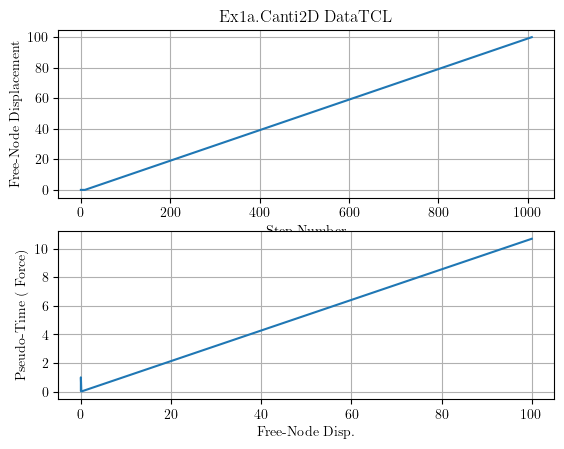

plot saved to DataTCL/Response_Lcol400.jpg
End of Run: Ex1a.Canti2D.Push.py.ipynb


In [30]:
plt.close('all')
fname3 = f'{dataDir}/DFree_Lcol{Lcol}.out'
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title(f'Ex1a.Canti2D {dataDir}')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
plt.savefig(f'{dataDir}/Response.jpg')
plt.show()
print(f'plot saved to {dataDir}/Response_Lcol{Lcol}.jpg')
print('End of Run: Ex1a.Canti2D.Push.py.ipynb')
